In [ ]:
from cellorganizer.tools import img2slml
import glob
import urllib.request
import tarfile 
import os

options = {}
options['verbose'] = True
options['debug'] = True
options['display'] = False
options['model.name'] = 'demo3D52'
options['train.flag'] = 'framework'
options['cell.class'] = 'cell_membrane'
options['cell.type'] = 'spharm_rpdm'
options['nucleus.class'] = 'nuclear_membrane'
options['nucleus.type'] = 'spharm_rpdm'

# postprocess of parameterization: alignment
options['model.spharm_rpdm.postprocess'] = True
# degree of the descriptor
options['model.spharm_rpdm.maxDeg'] = 31
# cellular components: either {'cell'}, {'nuc'}, or {'cell', 'nuc'}
options['model.spharm_rpdm.components'] = ['cell','nuc']

# latent dimension for the model
options['model.spharm_rpdm.latent_dim'] = 15


# the following list of parameters are adapted to the LAMP3 image
# collection, modify these according to your needs

directory = '/home/murphylab/cellorganizer/images/HeLa/3D/processed/'
dnaImagesDirectoryPath = [directory + 'LAM_cell1_ch0_t1.tif',directory + 'LAM_cell2_ch0_t1.tif', directory + 'LAM_cell3_ch0_t1.tif', directory + 'LAM_cell4_ch0_t1.tif', directory + 'LAM_cell5_ch0_t1.tif', directory + 'LAM_cell6_ch0_t1.tif', directory + 'LAM_cell7_ch0_t1.tif', directory + 'LAM_cell8_ch0_t1.tif', directory + 'LAM_cell9_ch0_t1.tif']
cellImagesDirectoryPath = [directory + 'LAM_cell1_ch1_t1.tif', directory + 'LAM_cell2_ch1_t1.tif', directory + 'LAM_cell3_ch1_t1.tif', directory + 'LAM_cell4_ch1_t1.tif', directory + 'LAM_cell5_ch1_t1.tif', directory + 'LAM_cell6_ch1_t1.tif', directory + 'LAM_cell7_ch1_t1.tif', directory + 'LAM_cell8_ch1_t1.tif', directory + 'LAM_cell9_ch1_t1.tif']
proteinImagesDirectoryPath = []

options['masks'] = [directory + 'LAM_cell1_mask_t1.tif', directory + 'LAM_cell2_mask_t1.tif', directory + 'LAM_cell3_mask_t1.tif', directory + 'LAM_cell4_mask_t1.tif', directory + 'LAM_cell5_mask_t1.tif', directory + 'LAM_cell6_mask_t1.tif', directory + 'LAM_cell7_mask_t1.tif', directory + 'LAM_cell8_mask_t1.tif', directory + 'LAM_cell9_mask_t1.tif']



options['model.resolution'] = [0.049, 0.049, 0.2000]
options['downsampling'] = [5, 5, 1]
options['model.filename'] = 'lamp2.xml'
options['model.id'] = 'lamp2'
options['model.name'] = 'lamp2'
options['nucleus.name'] = 'LAMP2'
options['cell.model'] = 'LAMP2'
dimensionality = '3D'
options['documentation.description'] = 'This model has been trained using demo3D52 from CellOrganizer'
options['model.spharm_rpdm.segminnucfraction'] = 0.1

img2slml(dimensionality, dnaImagesDirectoryPath, cellImagesDirectoryPath, proteinImagesDirectoryPath, options)

In [1]:
from cellorganizer.tools import slml2slml, slml2img
import os

framework_model = 'lamp2.mat'
vesicle_model   = '../../../models/3D/tfr.mat'
options_comb = {}
options_comb['output_filename'] = 'combined_model.mat'
options_comb['selection']       = '[1,1,0;0,0,1]'
slml2slml([framework_model,vesicle_model], options_comb)

options = {}
options['seed'] = 639848
options['targetDirectory'] = 'pwd'
options['prefix'] = 'img'
options['synthesis'] = 'all'
options['model.spharm_rpdm.synthesis_method']= 'random_sampling'
options['model.spharm_rpdm.imageSize'] = [205, 205, 18]
options['numberOfSynthesizedImages'] = 1
options['numberOfGaussianObjects'] = 5
options['rendAtStd'] = 2.0
options['objstd'] = 2.3
options['overlapsubsize'] = 1
options['overlapthresh'] = 0
options['compression'] = 'lzw'
options['microscope'] = 'none'
options['sampling.method'] = 'disc'
options['verbose'] = True
options['debug'] = False
options['output.tifimages'] = True
options['output.OMETIFF'] = True
options['output.indexedimage'] = True
options['output.SBMLSpatial'] = True
options['SBML.downsampling'] = [1/4, 1/4, 1]
options['SBML.spatial_use_compression'] = True
options['SBML.spatial_use_analytic_meshes'] = True
options['SBML.spatial_image'] = False
options['SBML.spatial_vcell_compatible'] = False

slml2img({'combined_model.mat'}, options)

In [3]:
import ipywidgets as wd
from IPython.display import HTML

def showvideo(video_number):
    display(HTML("""<video width="400" height="400" controls><source src="movie{}.mp4" type="video/mp4"></video>""".format(video_number)))

wd.interact(showvideo, video_number = [1]);

interactive(children=(Dropdown(description='video_number', options=(1,), value=1), Output()), _dom_classes=('w…

In [4]:
from IPython.display import HTML

HTML("""
<video width="320" height="240" controls>
  <source src="movie1.mp4" type="video/mp4">
</video>
""")


In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('movie1.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

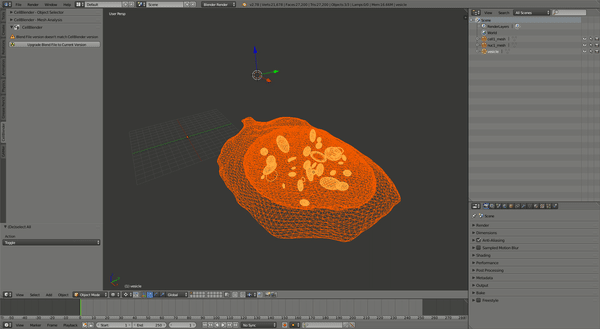

In [7]:
from IPython.display import Image
with open('CellBlender_FullScreen_gif.gif','rb') as file:
    display(Image(file.read()))